## Project 3
Predicting Car Price Based on Specifications to Help Optimize Pricing in Automobile Company.

### Car Price Dataset
    Dataset about cars' specifications and price.

### Data Source
https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

### Business Problem
    How to increase revenue from car sales by predicting accurate car price based on specifications?

### Objective
    Build a regression model to predict car price.

### Data Cleansing

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Car Price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
## Check Missing Values

In [11]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
## Check Outliers

In [13]:
df_num = df.select_dtypes(["int64","float64"])
col_num = df_num.columns
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5 *iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for car_ID
(0, 26)
Running for symboling
(0, 26)
Running for wheelbase
(3, 26)
Running for carlength
(1, 26)
Running for carwidth
(8, 26)
Running for carheight
(0, 26)
Running for curbweight
(0, 26)
Running for enginesize
(10, 26)
Running for boreratio
(0, 26)
Running for stroke
(20, 26)
Running for compressionratio
(28, 26)
Running for horsepower
(6, 26)
Running for peakrpm
(2, 26)
Running for citympg
(2, 26)
Running for highwaympg
(3, 26)
Running for price
(15, 26)


In [15]:
df.shape

(205, 26)

In [16]:
## Check Duplicated

In [17]:
df.duplicated().sum()

0

### EDA

In [19]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [21]:
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [22]:
## Univariate Analysis

In [23]:
len(col_num)

16

In [24]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


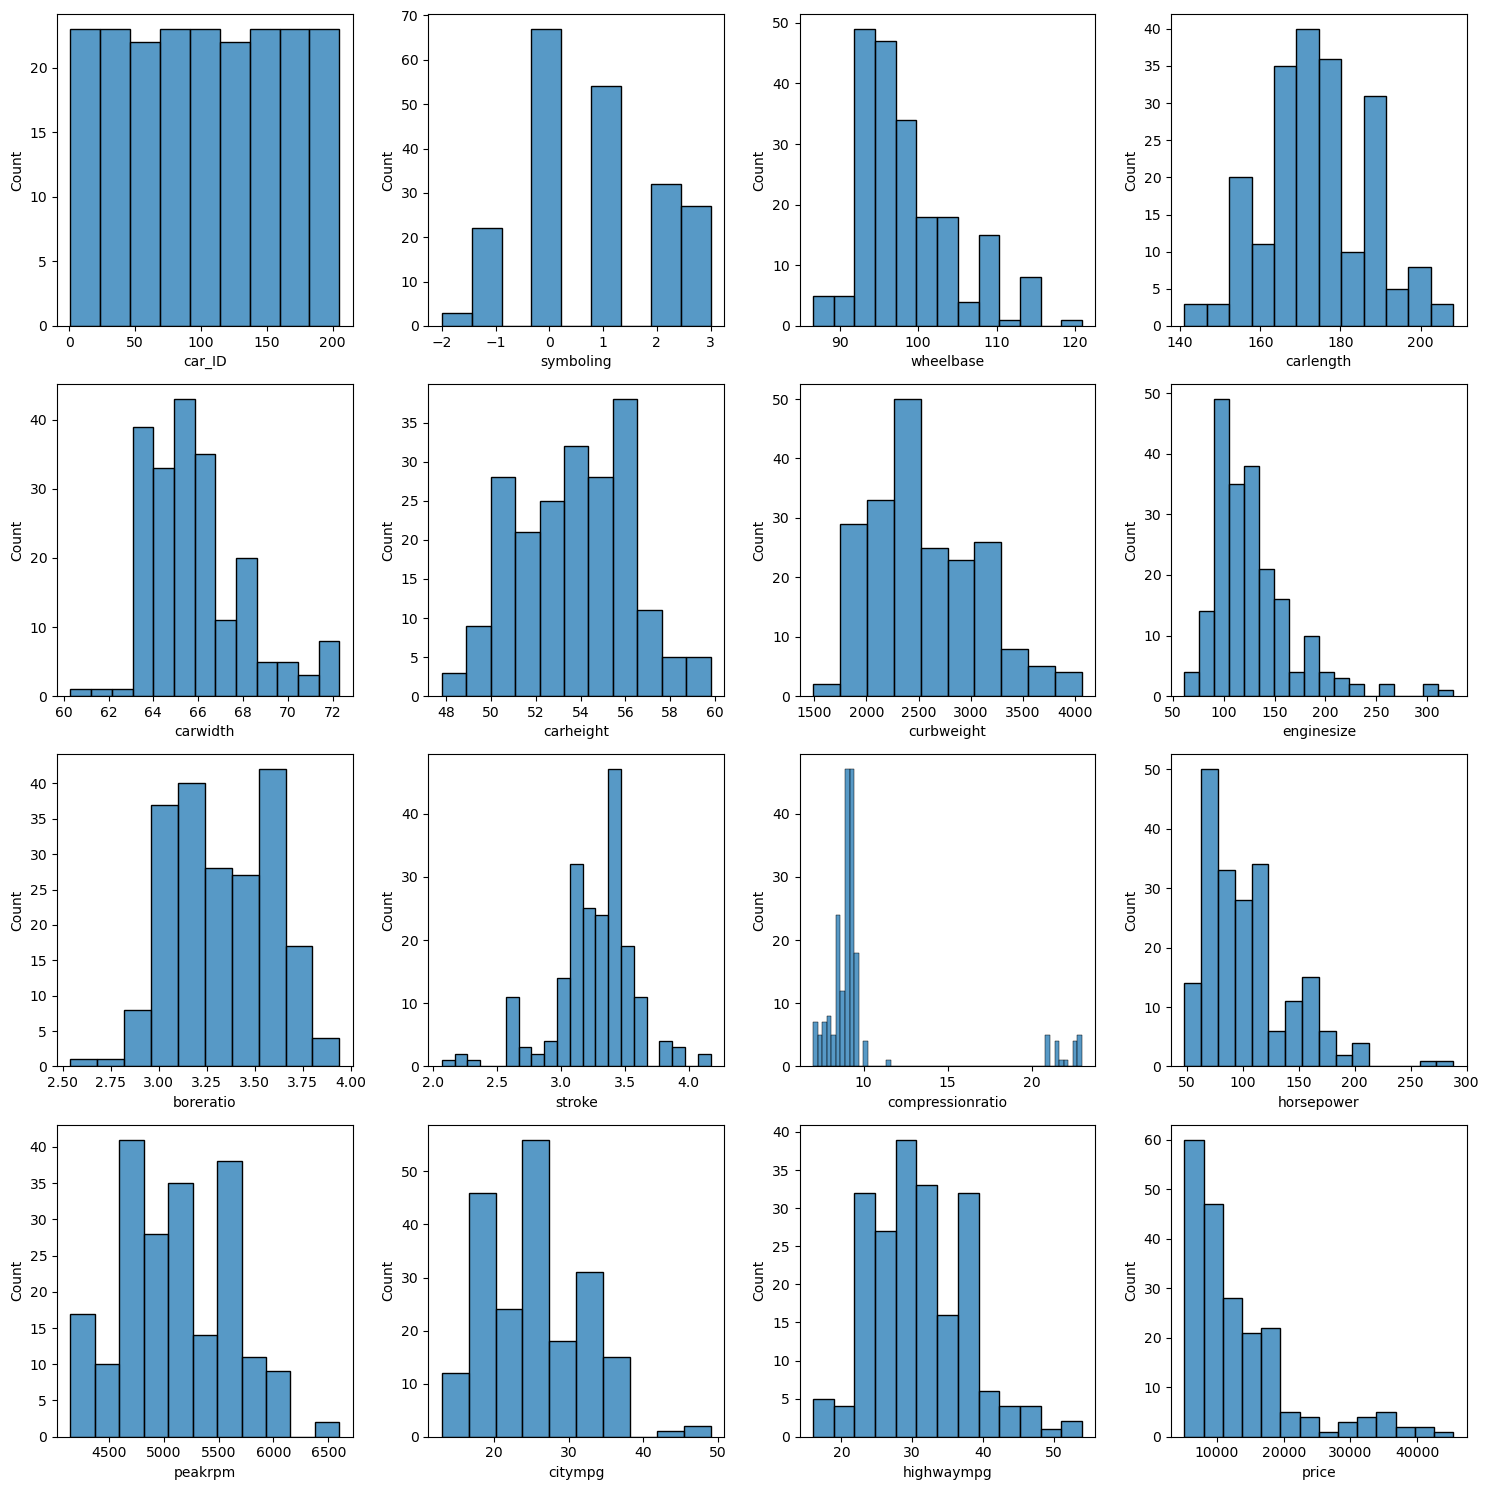

In [25]:
plt.figure(figsize = (15,15))
for i in range(len(col_num)):
    plt.subplot(4,4, i+1)
    sns.histplot(x = col_num[i], data = df)
    plt.tight_layout()


In [26]:
## Multivariate Analysis

In [27]:
filtered_col = col_num[2:10].tolist()
filtered_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke']

In [ ]:
sns.pairplot(df[filtered_col])

In [ ]:
sns.heatmap(df[filtered_col].corr(), annot = True)

### Additional Data Preparation before Modeling

In [ ]:
## Feature Engineering

In [ ]:
df["car_area"] = df["carheight"] * df["carwidth"]

In [ ]:
df["car_volume"] = df["car_area"] * df["carheight"]

In [ ]:
df

In [ ]:
## One Hot Encoding

In [ ]:
df = df.drop(columns = ["CarName"])

In [ ]:
df.head()

In [ ]:
df_obj = df.select_dtypes("object")
col_obj = df_obj.columns.tolist()

In [ ]:
col_obj

In [ ]:
df = pd.get_dummies(df, columns = col_obj)

In [ ]:
df.info()

In [ ]:
## Train Test Split

In [ ]:
X = df.drop(columns = ["price"])
y = df["price"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

### Evaluation

In [ ]:
y_lr = lr.predict(X_test)
y_lr

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_lr)

In [ ]:
import numpy as np
print(np.mean(y_test))
print(np.std(y_test))

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_lr)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_lr)

In [ ]:
y_lr

In [ ]:
y_diff = y_test - y_lr
y_diff_below_threshold = [x for x in y_diff if (x < 0.5 * 7412.862292745469) and (x > - 0.5 * 7412.862292745469)]


In [ ]:
len(y_diff_below_threshold)

In [ ]:
37/41

### Business Conclusion

#### Business Impact

In [ ]:
# Final model = Linear Regression
# MAE = 1952, RMSE = 3027

# Assume for every 100 cars that we have

# Before the model:
    # We don't know the accurate car price prediction.
    # Only 50% cars sold, 50 cars

# After the model:
    # We know the accurate car price that closes to market price.
    # Assuming the accurate car price are those with error/diff.
    # 37/41 = 90% of all cars are accurate.
    # There will be 93% cars sold, 93 cars